## Homework
1- Aplicar alguna técnica de detección de Outliers en la tabla venta, sobre los campos Precio y Cantidad. Realizar diversas consultas para verificar la importancia de haber detectado Outliers. Por ejemplo ventas por sucursal en un período teniendo en cuenta outliers y descartándolos.


Si quitando los outliers el promedio de ventas de modifica drasticamente, su importancia es alta. De lo contrario se consideran normales.

In [3]:
## Importar librerías necesarias

import pandas as pd
import matplotlib.pyplot as plt

In [11]:
## Creamos el DataFrame
df1_outlier_max = pd.read_csv('./Exports Mios/Venta_OutlierMax_Precio_cant.csv')
df1_outlier_max.head()

,IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad,promedio,maximo
0,51,2016-07-18,2016-07-21,1,1230,13,13001674,42788,42196,2,1486.27,21233.39
1,165,2020-04-01,2020-04-05,2,2823,13,13001674,42890,51500,2,1228.08,19189.97
2,238,2016-11-09,2016-11-12,1,2838,13,13001516,42942,274900,2,9510.52,136592.84
3,534,2019-06-03,2019-06-08,1,3237,13,13001330,42798,155628,2,2576.62,40066.40
4,545,2015-03-17,2015-03-20,2,3159,13,13001330,42839,35332,2,1048.26,15691.57


<AxesSubplot: xlabel='IdProducto', ylabel='maximo'>

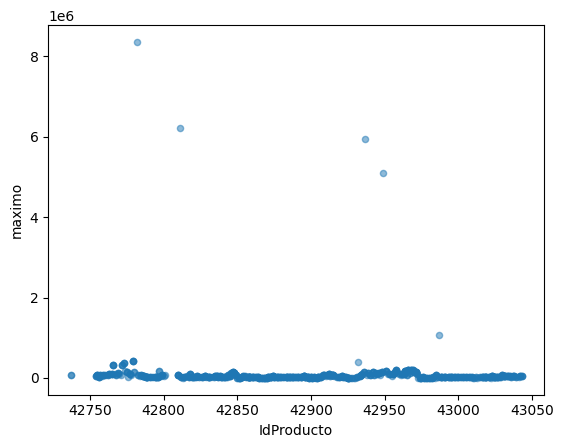

In [26]:
## Mostramos el grafico de los Outliers maximos mostrando por IdProducto y los Outliers máximos.
df1_outlier_max.plot.scatter(x='IdProducto', y='maximo', alpha=0.5)

<AxesSubplot: xlabel='maximo', ylabel='promedio'>

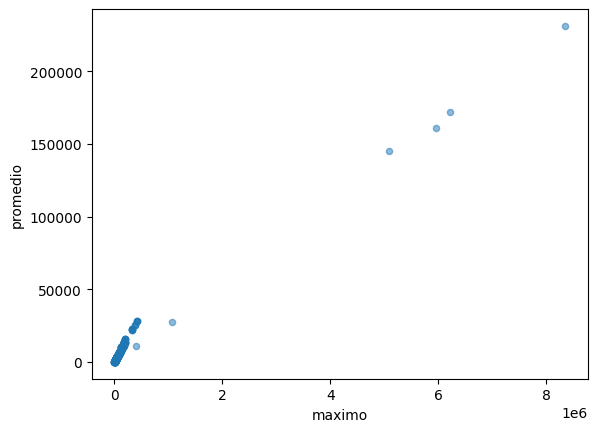

In [28]:
## Mostramos el grafico de los Outliers maximos mostrando por promedios y los Outliers máximos.
df1_outlier_max.plot.scatter(y='promedio', x='maximo', alpha=0.5)

    Es importante el análisis de Outliers porque en casos de ciertos productos, cuando se calcula el promedio, si hay una falla en la distinción de un número decimal o entero como puede ser 550.15 con 55015, el mismo tiende a elevarse por mucho mas de lo que en realidad debería ser. Si nosotros eliminamos estos outliers, obtenemos un promedio mucho mas cercano a su valor real.

2- Es necesario armar un proceso, mediante el cual podamos integrar todas las fuentes, aplicar las transformaciones o reglas de negocio necesarias a los datos y generar el modelo final que va a ser consumido desde los reportes. Este proceso debe ser claro y autodocumentado. ¿Se puede armar un esquema, donde sea posible detectar con mayor facilidad futuros errores en los datos?


    Si, se puede. Habría que crear un manual con definicones de los procesos que se utilizaron, como por ejemplo definir una columna motivo en el cual se especifique el motivo de una falla o falta de dato.
    En este caso, los motivos;

        1. Figuran ventas con cantidad cero.
        2. Outliers de la columna Cantidad.
        3. Outliers de la columna Precios.

In [31]:
## Previsualizamos la tabla hecha con SQL, y vemos los datos necesarios para acceder a ellos con sus motivos respectivos que hacen que se encuentren en la tabla de ventas auxiliares (Donde almacenamos las "fallas" o datos faltantes).
df2_aux_ventas = pd.read_csv('./Exports Mios/Aux_venta.csv')
df2_aux_ventas 

,IdVenta,Fecha,Fecha_Entrega,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad,Motivo
0,72,2018-08-22,2018-09-01,1185,13,1674,42779,9555.04,0,1
1,105,2017-10-28,2017-11-02,1107,13,1674,42822,816.86,0,1
2,154,2019-01-17,2019-01-21,1416,13,1674,42927,91.00,0,1
3,183,2016-11-28,2016-12-03,1426,13,1674,43016,454.00,0,1
4,190,2017-10-03,2017-10-04,908,13,1674,42977,111.00,0,1
...,...,...,...,...,...,...,...,...,...,...
3441,48103,2020-12-14,2020-12-17,1522,24,24003433,42790,762.96,2,3
3442,48186,2020-12-26,2020-12-31,1147,14,14001530,42917,1351.35,2,3
3443,48191,2020-12-26,2021-01-03,3346,11,11002467,42764,1385.78,3,3
3444,48217,2020-12-29,2021-01-01,1793,1,1001725,42764,1385.78,2,3


3- Elaborar 3 KPIs del negocio. Tener en cuenta que deben ser métricas fácilmente graficables, por lo tanto debemos asegurarnos de contar con los datos adecuados. 

    Realizamos:

        - KPI de Mayor cantidad de ventas por categoría.
        - Muestra de ventas con y sin Outliers.
        - KPI: Margen de Ganancia por producto superior a 20%.

- ¿Necesito tener en claro las métricas que voy a utilizar?

    Si, se necesitan tener en claro porque es necesario para la comprensión de las tablas y la manera de relacionarlas a fin de obtener KPI final.

 - ¿La métrica necesaria debe tener algún filtro en especial?

    Si, el filtro que se considere necesario segun el KPI que se quiera hacer. Por ejemplo:
        - Si se quiere mostrar la categoría de productos que mas cantidad de ventas tuvo, el filtro de la metrica sería realizar la sumatoria de todas las ventas FILTRADAS por esa categoría.

-  La Meta que se definió ¿se calcula con la misma métrica?

    Si.